<a href="https://colab.research.google.com/github/AtharvKhandelwal/Pokemon-Classification/blob/main/pokemon_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/images

/content/drive/MyDrive/images


In [4]:
%ls

Test/  Train/


In [5]:
classes = os.listdir("Train")
classes

['Bulbasaur', 'Pikachu', 'Charmander']

In [6]:
print("Training Data")
for f in classes:
    path = "Train/" + f
    length = len(os.listdir(path))
    print(f"{f} - {length}")

Training Data
Bulbasaur - 101
Pikachu - 101
Charmander - 102


In [7]:
print("Test Data")
for f in classes:
    path = "Test/" + f
    length = len(os.listdir(path))
    print(f"{f} - {length}")

Test Data
Bulbasaur - 41
Pikachu - 40
Charmander - 42


Data Loading

In [8]:
!pip install keras_preprocessing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.3 MB/s eta 0:00:00


In [12]:
from keras_preprocessing import image

In [13]:
# path = "Train/Pikachu/300.jpg"

In [22]:
train_data = [] #x
train_labels = [] #y

for category in classes:
    folder = f"Train/{category}"
    for img_name in os.listdir(folder):
        img_path = f"{folder}/{img_name}"
        img = image.load_img(img_path, target_size=(100,100))
        img_array = image.img_to_array(img)
        train_data.append(img_array)
        train_labels.append(category)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [23]:
len(train_labels)

304

Data Preprocessing-------

In [24]:
train_data = np.array(train_data)
train_labels = np.array(train_labels)

In [25]:
# len(train_data)
train_labels.shape

(304,)

In [26]:
train_data = train_data.reshape(len(train_data), 30000)
train_data.shape

(304, 30000)

In [27]:
# train_labels
category2label = {'Pikachu':0, 'Charmander':1, 'Bulbasaur':2}
label2category = {0: 'Pikachu', 1: 'Charmander', 2: 'Bulbasaur'}

In [28]:
train_labels = np.array([category2label[label] for label in train_labels])

In [29]:
train_labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [31]:
from keras.utils import to_categorical

In [32]:
train_labels = to_categorical(train_labels)

In [33]:
train_labels.shape

(304, 3)

In [34]:
train_labels[:7]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

Model Architecture------

In [35]:
from keras.layers import Dense
from keras import Sequential

In [36]:
features = train_data.shape[1]
features

30000

In [37]:
model = Sequential()
model.add( Dense(units=512, activation='relu', input_shape=(features,)))
model.add( Dense(units=256, activation='relu' ))
model.add( Dense(units=128, activation='relu' ))
model.add( Dense(units=64, activation='relu' ))
model.add( Dense(units=3, activation='softmax' ))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │      15,360,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,533,187 (59.25 MB)

 Trainable params: 15,533,187 (59.25 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(train_data, train_labels, batch_size=32, epochs=50)

In [41]:
test_data = [] #x
test_labels = [] #y

for category in classes:
    folder = f"Test/{category}"
    for img_name in os.listdir(folder):
        img_path = f"{folder}/{img_name}"
        img = image.load_img(img_path, target_size=(100,100))
        img = image.img_to_array(img)
        test_data.append(img)
        test_labels.append(category)

In [42]:
test_data = np.array(test_data)
test_labels = np.array(test_labels)
# test_labels.shape

In [43]:
test_data.shape
test_labels.shape

(123,)

In [44]:
test_labels = np.array([category2label[label] for label in test_labels])

In [45]:
test_labels = to_categorical(test_labels)
test_labels.shape

(123, 3)

In [46]:
test_data = test_data.reshape(len(test_data), 30000)
test_data.shape

(123, 30000)

In [47]:
model.evaluate(test_data, test_labels)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9184 - loss: 23.8215


[26.208484649658203, 0.9105691313743591]

In [48]:
# model.predict(test_data).round(3)
pred = model.predict(test_data).argmax(axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


In [ ]:
pred[:10]

In [ ]:
[label2category[label] for label in pred]


PREDICTIONS

In [51]:
test_img = "Test/Pikachu/2036.jpg"
test_img = image.load_img(test_img, target_size=(100,100))
test_img = image.img_to_array(test_img)
# test_img.shape


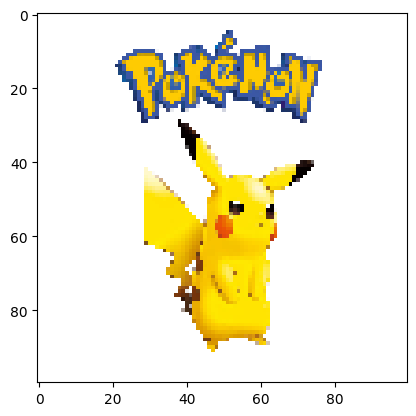

In [52]:
plt.imshow(test_img.astype('int'));

In [53]:
# test_img.shape
test_img = test_img.reshape(1,30000)
test_img.shape

(1, 30000)

In [56]:
# Assuming 'model' is your Keras model object
predictions = label2category[model.predict(test_img).argmax()]

print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Charmander
